### Dataset : https://www.kaggle.com/datasets/marusagar/bank-customer-attrition-insights

### Objective:
The objective of this case study is to analyze customer attrition patterns in the banking sector using data-driven insights. By exploring customer demographics, account information, and transaction behavior, we aim to identify key factors influencing customer churn. This study will help in predicting potential attrition cases, enabling banks to take proactive measures to retain valuable customers and enhance customer experience.

### Dataset Description:

RowNumber: Index number of the record.

CustomerId: Unique identifier for each customer.

Surname: Customer’s last name.

CreditScore: Customer's credit rating score.

Geography: Country of residence.

Gender: Customer’s gender.

Age: Age of the customer.

Tenure: Number of years the customer has been associated with the bank.

Balance: Customer’s account balance.

NumOfProducts: Number of bank products the customer is using.

HasCrCard: Whether the customer owns a credit card (1 = Yes, 0 = No).

IsActiveMember: Indicates if the customer is an active bank member (1 = Yes, 0 = No).

EstimatedSalary: Customer’s estimated salary.

Exited: Target variable (1 = Customer has left, 0 = Customer remains with the bank).

Complain: Whether the customer has filed any complaints (1 = Yes, 0 = No).

Satisfaction Score: A score indicating customer satisfaction (scale of 1-5).

Card Type: Type of credit card owned by the customer (e.g., Gold, Platinum, Silver).

Point Earned: Loyalty points earned by the customer based on transactions.

In [49]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Load the dataset into a Pandas DataFrame.

In [2]:
df = pd.read_csv('Bank_Customer_Attrition_Insights_Data.csv')

### Display the first five rows of the dataset.

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15598695,Fields,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15649354,Johnston,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15737556,Vasilyev,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15671610,Hooper,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15625092,Colombo,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


### Check the shape of the dataset (number of rows and columns).

In [4]:
df.shape

(10000, 18)

### Retrieve the column names.

In [5]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Complain',
       'Satisfaction Score', 'Card Type', 'Point Earned'],
      dtype='object')

### Identify missing values in the dataset.

In [6]:
df.isnull().sum()

RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

### Get the summary statistics of numerical columns.

In [7]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


### Count the total number of customers in the dataset.

In [8]:
total_customers = len(df['CustomerId'])
total_customers

10000

### Identify the number of unique customer locations (geographies).

In [9]:
unique_locations = df['Geography'].nunique()
unique_locations

3

### Determine the geography with the highest number of customers.

In [10]:
no_of_customers = df.groupby('Geography')['CustomerId'].count()
no_of_customers

Geography
France     5014
Germany    2509
Spain      2477
Name: CustomerId, dtype: int64

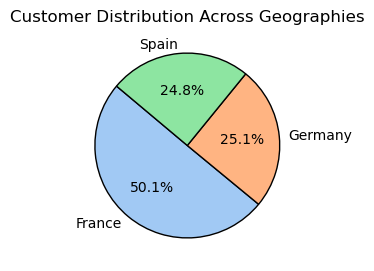

In [52]:
plt.figure(figsize=(3, 3))
plt.pie(
    no_of_customers, labels=no_of_customers.index, autopct="%1.1f%%",
    colors=sns.color_palette("pastel"), startangle=140, wedgeprops={"edgecolor": "black"}
)
plt.title("Customer Distribution Across Geographies")

plt.show()

### Compute the gender distribution of customers.

In [11]:
gender_dist = df['Gender'].value_counts()
gender_dist

Male      5457
Female    4543
Name: Gender, dtype: int64

### How many customers have exited the bank?

In [12]:
churn_ratio = df['Exited'].value_counts()
churn_ratio

0    7962
1    2038
Name: Exited, dtype: int64

<Axes: xlabel='Exited', ylabel='count'>

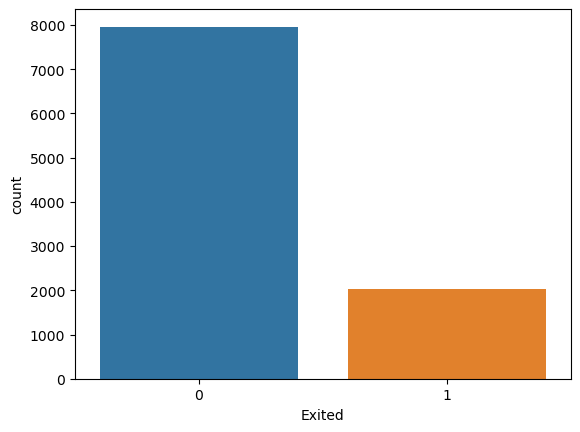

In [53]:
sns.countplot(x='Exited',data=df)

### Calculate the overall churn rate in the dataset.

In [13]:
new_df = len(df[df['Exited'] == 1])
df_count = df['CustomerId'].count()
churn_rate = new_df / df_count * 100
churn_rate

20.380000000000003

### Find the proportion of male and female customers who have exited the bank.

In [14]:
new_df = df[df['Exited'] == 1]
male_female_ratio = new_df['Gender'].value_counts()
male_female_ratio

Female    1139
Male       899
Name: Gender, dtype: int64

In [15]:
proportion = male_female_ratio / male_female_ratio.sum()
proportion

Female    0.558881
Male      0.441119
Name: Gender, dtype: float64

<Axes: xlabel='Gender', ylabel='count'>

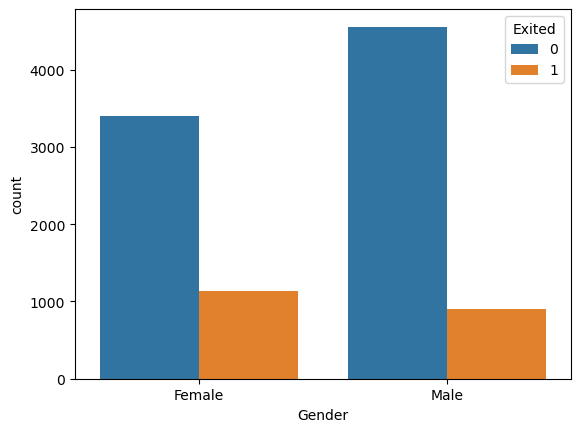

In [54]:
sns.countplot(x='Gender', hue='Exited', data=df)

### Compare the churn rate across different geographical locations.

In [16]:
new_df = df[df['Exited'] == 1]
exited_customers = new_df.groupby('Geography')['CustomerId'].count()
total_customers = df.groupby('Geography')['CustomerId'].count()
churn_rate = exited_customers / total_customers * 100
churn_rate

Geography
France     16.174711
Germany    32.443204
Spain      16.673395
Name: CustomerId, dtype: float64

### Identify which age group has the highest churn rate.

In [17]:
def grouping_age(age):
    
    if age < 25:
        return f'18-25'
    elif age < 35:
        return f'25-35'
    elif age < 45:
        return f'35-45'
    elif age < 55:
        return f'45-55'
    else:
        return f'55-Above'

In [18]:
df['Age_Group'] = df['Age'].apply(grouping_age)

In [19]:
new_df = df[df['Exited'] == 1]
age_group_churn = new_df.groupby('Age_Group')['CustomerId'].count()
total_customers = df.groupby('Age_Group')['CustomerId'].count()
churn_rate = age_group_churn / total_customers * 100
churn_rate

Age_Group
18-25        8.752735
25-35        7.759156
35-45       17.683999
45-55       48.148148
55-Above    38.775510
Name: CustomerId, dtype: float64

<Axes: xlabel='Age_Group', ylabel='count'>

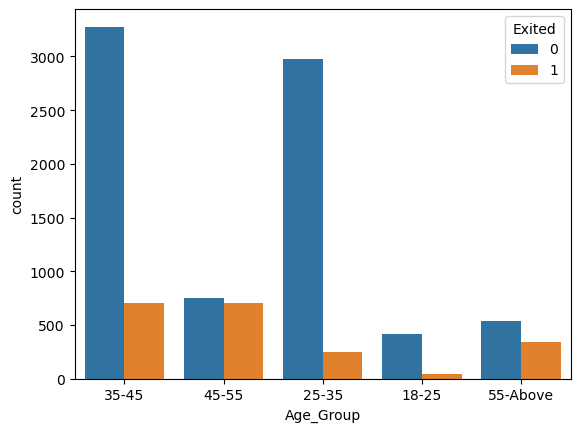

In [48]:
sns.countplot(x='Age_Group', hue='Exited', data=df)

### Find the average credit score of customers who have exited the bank vs. those who have stayed.

In [20]:
exited_customers = df[df['Exited'] == 1]['CreditScore'].mean()
stayed_customers = df[df['Exited'] == 0]['CreditScore'].mean()

print(f'Average credit score of customers who have exited the bank is {exited_customers}')
print(f'Average credit score of customers who have stayed with the bank is {stayed_customers}')

Average credit score of customers who have exited the bank is 645.4146221786065
Average credit score of customers who have stayed with the bank is 651.8378548103492


### Compare churn rates based on tenure to determine if long-term customers are more likely to stay.

In [21]:
new_df = df[df['Exited'] == 1]
tenure_based_churn = new_df.groupby('Tenure')['CustomerId'].count()
total_customers = df.groupby('Tenure')['CustomerId'].count()
churn_rate = tenure_based_churn / total_customers * 100
churn_rate

Tenure
0     23.002421
1     22.415459
2     19.179389
3     21.110010
4     20.525784
5     20.652174
6     20.268873
7     17.217899
8     19.219512
9     21.747967
10    20.612245
Name: CustomerId, dtype: float64

### Determine if having a credit card impacts customer attrition.

In [22]:
# Churn ratio for customers who have a credit card
new_df_with_cc = df[df['HasCrCard'] == 1]
churn_with_cc = new_df_with_cc['Exited'].value_counts()

# Churn ratio for customers who do not have a credit card
new_df_without_cc = df[df['HasCrCard'] == 0]
churn_without_cc = new_df_without_cc['Exited'].value_counts()

print(f"Churn ratio for customers with a credit card:\n{churn_with_cc}")
print()
print(f"Churn ratio for customers without a credit card:\n{churn_without_cc}")

Churn ratio for customers with a credit card:
0    5630
1    1425
Name: Exited, dtype: int64

Churn ratio for customers without a credit card:
0    2332
1     613
Name: Exited, dtype: int64


### Analyze how churn varies across different geographies and active membership statuses.

In [28]:
churn_pivot = df.pivot_table(index='Geography', 
                                    columns='IsActiveMember', 
                                    values='Exited',
                                   aggfunc='mean')
churn_pivot.columns = ['Inactive_Members_Churn_Rate','Active_Members_Churn_Rate']
churn_pivot *= 100
churn_pivot

,Inactive_Members_Churn_Rate,Active_Members_Churn_Rate
Geography,,
France,21.172101,11.501351
Germany,41.078509,23.717949
Spain,23.347639,10.746951


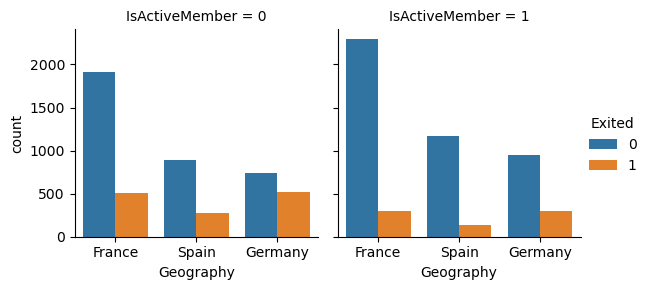

In [55]:
sns.catplot(
    x="Geography", hue="Exited", col="IsActiveMember", 
    data=df, kind="count", height=3, aspect=1
)

### Does having a low satisfaction score increase the churn rate? Analyze the relationship between customer satisfaction scores and churn.

In [39]:
churn_ratio = df.pivot_table(index='Satisfaction Score', values='Exited', aggfunc='mean')*100
churn_ratio.columns = ['Churn_Rate']
print(churn_ratio)

                    Churn_Rate
Satisfaction Score            
1                    20.031056
2                    21.797418
3                    19.637610
4                    20.617530
5                    19.810379


<Axes: xlabel='Satisfaction Score', ylabel='count'>

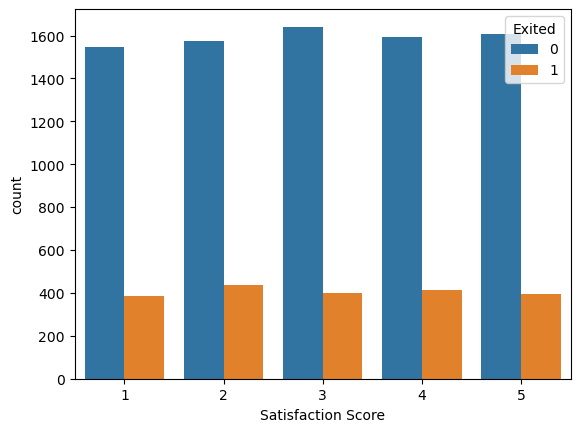

In [41]:
sns.countplot(x='Satisfaction Score', hue='Exited', data=df)  

### Does having a high credit score reduce the likelihood of customer churn?

In [63]:
def categorize_credit_score(score):
    
    if score <= 500:
        return 'Low'
    elif score > 500 and score <= 750:
        return 'Medium'
    else:
        return 'High'

In [64]:
df['Credit_Score_Category'] = df['CreditScore'].apply(categorize_credit_score)

In [67]:
churn_by_credit = df.groupby('Credit_Score_Category')['Exited'].mean()*100
print(churn_by_credit)

Credit_Score_Category
High      19.649562
Low       23.639191
Medium    20.260343
Name: Exited, dtype: float64


<Axes: xlabel='Credit_Score_Category', ylabel='count'>

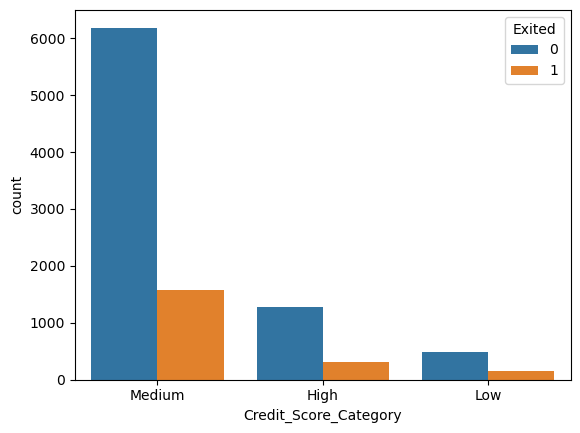

In [66]:
sns.countplot(x='Credit_Score_Category', hue='Exited', data=df)

##  Key Insights :

#### 1. Churn Trends by Geography
Germany has the highest churn rate, while France and Spain show relatively lower churn.
Active members churn significantly less across all regions, emphasizing the need for customer engagement strategies.

#### 2. Credit Score & Churn Behavior
Customers with higher credit scores are less likely to churn.
Low and medium credit score customers exhibit higher churn, possibly due to financial instability or credit risks.
Offering loyalty benefits and customized financial solutions to these groups could improve retention.


#### 3. Active Membership’s Impact on Retention
Inactive members have a much higher churn rate than active members.
Encouraging customer interaction through personalized offers, engagement campaigns, and rewards could increase retention.


#### 4. Gender-Based Churn Trends
Female customers have a higher churn rate than male customers.
Understanding the specific needs of female customers and offering targeted financial products could improve retention.


### Business Recommendations:

#### 1. Boost customer engagement
Target inactive members with personalized services, offers, and loyalty programs.


#### 2. Encourage financial stability 
Offer special benefits to customers with lower credit scores or low account balances.


#### 3. Develop gender-specific strategies
Analyze and address the specific needs of female customers.


#### 4. Improve customer satisfaction
Address complaints proactively, offer better support, and personalize banking services.


#### 5. Reward long-term customers 
Implement retention programs for long-tenured customers to reinforce loyalty.